### Application of clustering on IRIS dataset

**Problem Statement: Assign a cluster to all IRIS flower based on input parameters.**

In [14]:
#Import the packages
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
import math

In [16]:
#Load the dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis

In [17]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
iris.shape

(150, 5)

In [20]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null or missing values in the iris dataset, and hence, no need for imputation.

In [23]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

The iris dataset is divided equally into 3 classes: Versicolor, Virginica and Setosa. Thus, the size of the clusters generated would be approximately equal.

### Visualization

Text(0.5, 1.0, 'Petal Length vs Petal Width')

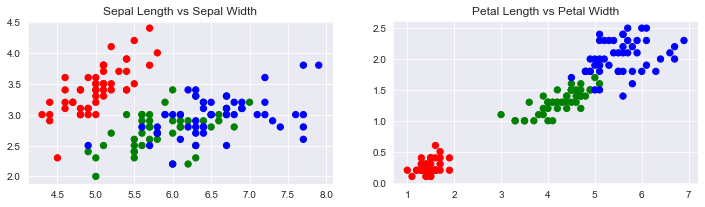

In [47]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
plt.subplot(1, 2, 1)
plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[y], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['petal_length'], x['petal_width'], c= colors[y], s=40)
plt.title('Petal Length vs Petal Width')

The first subplot shows a clear grouping of one of the 3 species(in red), which is setosa, while the data points belonging to the other two clusters are not quite separable. Performing kmeans clustering on the data would help create separate and identifiable clusters.

### Train-Test split

In [29]:
#Label encoding the dependent variable, 'species'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(iris['species'])
x = iris.iloc[:,:-1]

In [30]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Finding the optimal value of k

In [36]:
#Finding inertia for a range of K values
K = range(1,10)
ss = []
for k in K:
    #Building and fitting the model
    kmean = KMeans(n_clusters=k)
    kmean.fit(x)
    ss.append(kmean.inertia_)
ss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.29822966507179,
 30.400007434594393,
 28.024082180719198]

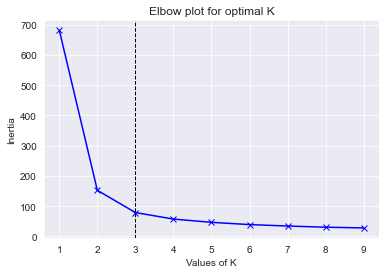

In [38]:
#Plotting inertia for various values of x

sns.set_style('darkgrid')
plt.plot(K, ss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow plot for optimal K')
plt.axvline(x=3,ls="--",linewidth=1,c='k')

The elbow plot showing values of inertia for each value of k depicts a break in the slope(elbow) at the point where x (number of clusters) = 3. Therefore, the k-means model would be built on 3 clusters, which we know is accurate based on prior knowledge of the dataset.

### Building the kmeans clustering model

In [51]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [40]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Visualizing the clusters after performing kmeans clustering**

Text(0.5, 1.0, "Model's classification")

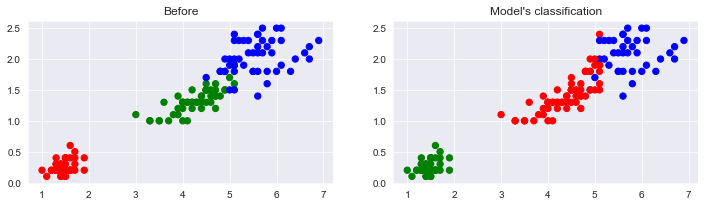

In [48]:
#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# The fudge to reorder the cluster ids.
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['petal_length'], x['petal_width'], c=colors[y], s=40)
plt.title('Before')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['petal_length'], x['petal_width'], c=colors[predictedY], s=40)
plt.title("Model's classification")

The visualization now shows a more distinct representation of the 3 clusters.

### Model Evaluation

In [58]:
print('Accuracy of the model: ', round(sm.accuracy_score(pred, y)*100,2), '%')

Accuracy of the model:  89.33 %


In [62]:
print('Confusion matrix: \n\n', sm.confusion_matrix(pred, y))

Confusion matrix: 

 [[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]


**Interpretation:**  

Class 1 - Setosa  
Class 2 - Versicolor  
Class 3 - Virginica  

The following inferences can be gained from the confusion matrix:-
- Correctly identifed all 50 data points of the setosa cluster.
- Correctly classified 48 data points belonging to versicolor but miss-classified 2 of it as virginica.
- Correctly classified 36 data points belonging to virginica but miss-classified 14 of it as versicolor.